# Breast Cancer Data Exploration Notebook
This notebook performs exploratory data analysis on the raw breast cancer dataset to gain insights into the data and understand the distribution of various features. It visualizes the data using various plots and summarizes the findings to guide further preprocessing and modeling.

## 1: Read the raw data  

In [28]:
import pandas as pd

df = pd.read_csv('../data/raw_data_breast_cancer.csv')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 1.1: Observation
After performing basic data exploration on the breast cancer dataset, I found that the dataset contains 569 data points with 33 columns, out of which 32 are features and 1 is the target variable. The dataset does not have any null values, which is a good sign as I don't have to perform any imputation. However, I observed that two columns - 'Unnamed: 32' and 'id' - are not useful features for our project. The 'id' column is unique for each data point and can be used to identify the patients, whereas the 'Unnamed: 32' column contains only null values. Hence, I will drop these two columns from our dataset.


### 1.2 Dropping Unnecessary Columns

In [31]:
# Drop the 'Unnamed: 32' and 'id' columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [32]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2: Exploring Feature Distributions

In [33]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


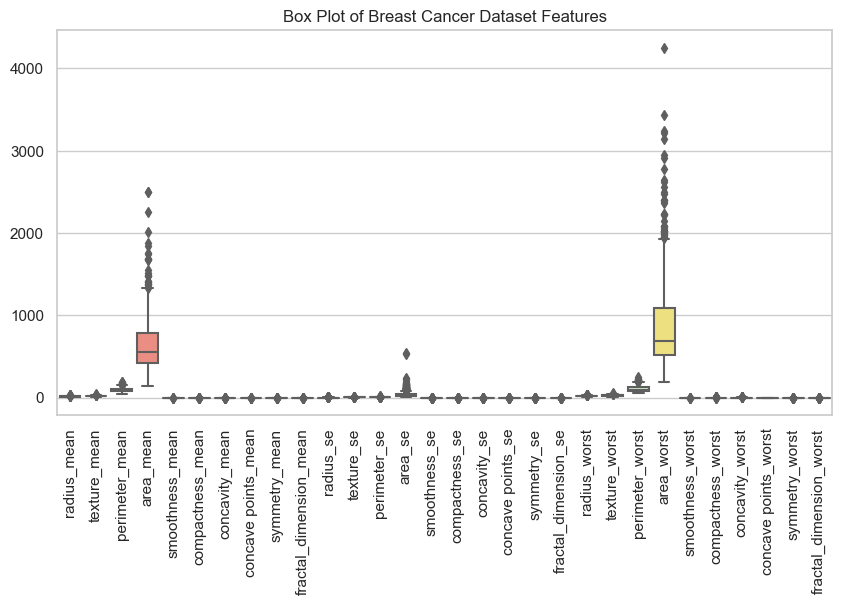

In [34]:
# Plot a box plot for all features
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title('Box Plot of Breast Cancer Dataset Features')

# Save the plot
plt.savefig('../images/features_box_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


### 2.1:  Observation
After performing an analysis of the breast cancer dataset using the describe() function and box plots, I observed that the majority of the features have a wide range of values and are on different scales. This could pose a challenge for some machine learning algorithms, as they might give more weight to features with larger values, regardless of their actual importance in predicting the target variable. Furthermore, I detected some potential outliers in a few features that could impact the predictive model's performance. These insights will help with appropriate data preprocessing and the selection of a suitable machine learning algorithm for the task at hand. The dataset has three main categories of features, namely '_mean', '_se', and '_worst', and requires normalization to bring it to a similar scale, which can be accomplished by rescaling the values of features to a range of [0,1]. This rescaling standardizes the data and eliminates bias caused by differing scales.
Furtehrmore, it can be concluded that the 'area' data points as a whole have outliers that need to be addressed to ensure the best performance of machine learning algorithms.

## 3: Exploring 'diagnosis' column

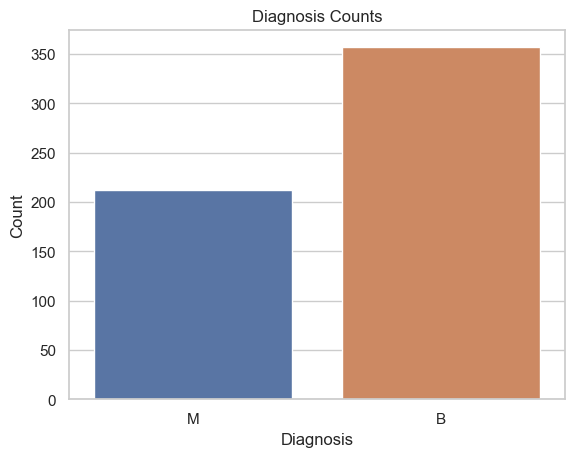

In [36]:
# Count values in 'diagnosis' column
diagnosis_counts = df['diagnosis'].value_counts()

# Create countplot with seaborn
sns.countplot(x='diagnosis', data=df)

# Add title and axis names
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Save the plot
plt.savefig('../images/diagnosis_counts.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


### 3.1: Observation 
Upon counting the number of diagnoses in the breast cancer dataset using the 'diagnosis' column, it is evident that there are more malignant (M) cases than benign (B) cases. This information is crucial in understanding the class distribution of the dataset and can guide us in selecting appropriate evaluation metrics for our machine learning model. However, machine learning algorithms require numerical data for processing. Therefore, it is necessary to convert the categorical 'diagnosis' column into numerical values. This conversion can be achieved by using techniques such as label encoding or one-hot encoding.

## 4: Conclusion
#### Preprocessing Steps: Feature Scaling and One-Hot Encoding on Diagnosis Column.
In conclusion, the breast cancer dataset requires some preprocessing steps to be taken before applying any machine learning algorithm. These steps include:

1: Performing feature scaling on the dataset since the features are on different scales. Feature scaling is the process of rescaling the values of features to a similar scale to prevent any bias towards features with higher values. This will help the machine learning algorithm to perform better and give more accurate predictions.

2: Converting the categorical values of the diagnosis column ('M' and 'B') into numerical values for the machine learning algorithm to interpret them correctly. One-hot encoding is the technique that can be used to convert categorical values into numerical values. One-hot encoding creates a binary column for each category, and the presence or absence of the category is indicated by a 1 or 0, respectively, in the corresponding column.

## 5: Save processed file as csv

In [37]:
# Save the dataframe to a CSV file in the data folder
df.to_csv('../data/processed_data_breast_cancer.csv', index=False)

In [1]:
import seaborn as sns
import pandas as pd

# Load breast cancer dataset
df = pd.read_csv("../data/processed_data_breast_cancer.csv")

# Select features to plot
features = ['radius_mean', 'perimeter_mean', 
                     'concave points_mean', 'radius_worst', 
                     'perimeter_worst', 'area_worst', 'concave points_worst']



<AxesSubplot:>

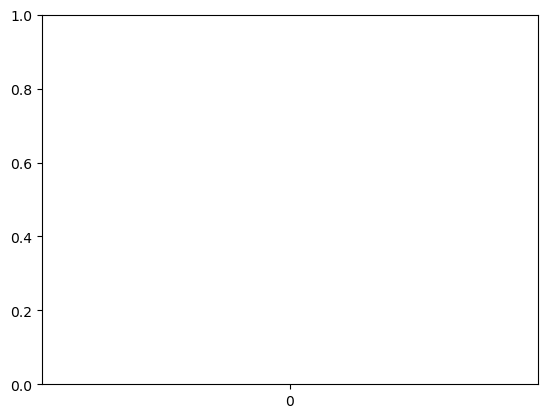

In [8]:

# Normalize data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Plot using violin plot
sns.violinplot(df=df[features])